Introduction
============

Random numbers have many applications in science and computational modeling.  The purpose of this lecture is to look at some practical problems involving the use and generation of random numbers and learn how to program with such numbers.  

The key idea in computer simulations with random numbers is first to formulate an algorithmic description of the phenomenon we want to study.  This description frequently maps directly onto a short Python program, where the power comes from performing a large number of repeated calculations drawing from random distributions.


Generating Random Numbers
-------------------------

Python has a standard library module, random, for generating random numbers.  The NumPy library also has built in random number generators, which parallel much of the capabilities of the random module, but allow one to generate arrays of random numbers with given properties.

The most basic function in the random and NumPy random modules is a function that retuns a random floating point number from 0.0 to 1.0, with equal probability of producing any number within that range.  (When all numbers are equally likely to be generated, this is known as a uniform distribution).

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print( random.random() ) 

0.107958828642


If you run the previous cell, you will see that you get a different number between 0.0 and 1.0 each time it is run.


If we need an array of random numbers for some purpose, we can generate them in any shape, using the np.random.rand function.

In [3]:
r = np.random.rand(5,2)
print( r.shape ) 
print( r ) 

(5, 2)
[[ 0.94574773  0.0107692 ]
 [ 0.54057387  0.70578529]
 [ 0.67488835  0.36666406]
 [ 0.7052771   0.35299195]
 [ 0.48087828  0.6704222 ]]


All computations of random numbers are based on deterministic algorithms, so the sequence of numbers cannot 
be truly random.   However, random number generator algorithms can create numbers that appear to lack any 
pattern (if they are correctly written).   The pseudo-random nature of the random number sequence thus 
generated can be a problem in some very complex numerical  simulations.  But the pseudo-random nature can 
also be beneficial.  For example, we can cause the same sequence of  random numbers to be regenerated if 
we need to rerun or verify a stochastic simulation.

So normally every time you import random, or the NumPy equivalents, the subsequent sequence of numbers 
generated will yield different numbers.  Try running the following cell multiple times.  You 
will see that it always generates 10 different random numbers. (HINT: try using Ctrl+Enter to run a cell multiple times)

In [4]:
for i in range(10): 
    print( random.random() ) 

0.422740074578
0.778452067514
0.946483674719
0.278050618748
0.711390601343
0.415894439856
0.638465033256
0.809597018455
0.0910818481797
0.936691322019


But if we need to regenerate a known sequence of random numbers, we can set what is known as the random number generator 
seed to some particular value.  Once a random number generator starts from a given seed, it will generate the same 
sequence of numbers again.  For example, try running the same as above, but setting the seed number before 
generating random numbers.  Try it with different seed values as well.

In [5]:
random.seed(42)
for i in range(10): 
    print( random.random() ) 

0.639426798458
0.0250107552227
0.275029318369
0.223210738149
0.736471214164
0.676699487423
0.892179567705
0.0869388326294
0.421921819685
0.0297972194381


Uniformly Distributed Random Numbers
====================================

As we mentioned, the basic random()/rand() function returns a float between 0.0 and 1.0 with a uniform 
distribution.  What does this mean?  Lets draw a large number of 2 dimensional points from the uniform 
distribution and plot them to see how they are distributed.

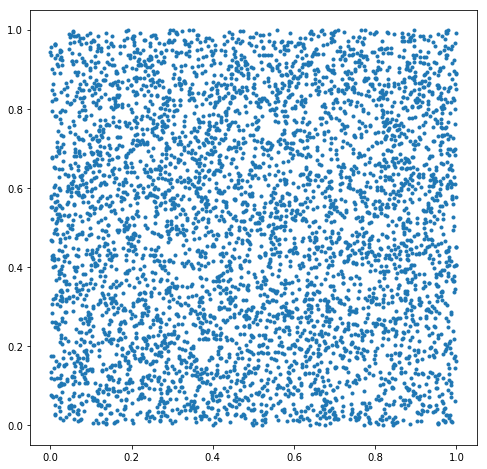

In [6]:
d = np.random.rand(5000,2)
plt.figure(figsize=(8,8))
plt.plot(d[:,0], d[:,1], '.')

You should see that there is no pattern, the numbers are distributed evenly (uniformly) over both of the 2 dimensions in the range from 0 to 1.  Another way to visualize a uniform distribution is to examine the histogram of a generated sequence.

(array([ 57.,  56.,  49.,  50.,  58.,  40.,  49.,  55.,  51.,  31.,  54.,
         60.,  54.,  39.,  45.,  46.,  50.,  52.,  50.,  54.]),
 array([  6.71567826e-04,   5.05213910e-02,   1.00371214e-01,
          1.50221037e-01,   2.00070861e-01,   2.49920684e-01,
          2.99770507e-01,   3.49620330e-01,   3.99470153e-01,
          4.49319977e-01,   4.99169800e-01,   5.49019623e-01,
          5.98869446e-01,   6.48719269e-01,   6.98569093e-01,
          7.48418916e-01,   7.98268739e-01,   8.48118562e-01,
          8.97968385e-01,   9.47818209e-01,   9.97668032e-01]),
 <a list of 20 Patch objects>)

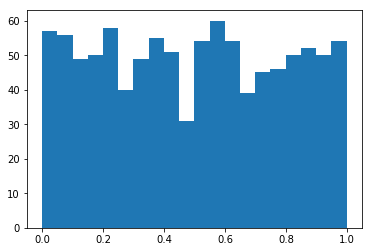

In [7]:
d = np.random.rand(1000)
plt.hist(d, bins=20)

A histogram counts the number of occurrences of some set of date and sorts them into what are known as bins.  Here we used 20 bins
in the histogram.  This means that the first bin counts all of the numbers that were in the range from 0.0 to 0.05.  The next bin
counts the number of items that had values between 0.05 and 0.1, etc.  So the bars in the histogram simply represent the count or
frequency of the values that were seen in the range for each bin.

You may see a few bars bigger or smaller than others (indicating more or less random numbers falling in that bin).  But try 
rerunning the above cell with 5000, 10,000 or even 50,000 points.  The larger the sample of random numbers you draw, the more 
you will see how evenly they are distributed over the interval.

Generating Random Numbers with Different Ranges
-----------------------------------------------

The random number functions we have seen so far only generate random numbers between 0.0 and 1.0.  What if we need 
uniformly distributed floating point numbers in a different range, say from -5.0 to 5.0?

Well one way that you may encounter in older C and Fortran code, where there are basically only the seed() and rand() 
functions in the library/API, is simply to recast generated numbers into the desired range.  This is easily done 
for the range from -5.0 to 5.0, which has a span of 10.0 units, like this:

In [8]:
[(random.random() * 10.0) - 5.0  for i in range(10)]

[-2.8136202519639664,
 0.053552881033623656,
 -4.734640303161363,
 -3.011623493133515,
 1.4988443777952316,
 0.4494148060321663,
 -2.795593779593033,
 0.8926568387590876,
 3.0943045667782663,
 -4.93501240321939]

In general, to recast a number in the range from 0 to 1 into any range `min,max` with $span = max - min$ you can 
do `(rand() * span) + min`.  In the Python random libraries, though, there are generally convenience function to 
do this more easily, for example:

In [9]:
[random.uniform(-5.0, 5.0) for i in range(10)]

[3.058192518328079,
 1.9813939498822686,
 -1.5974948348200813,
 -3.4452050018821847,
 4.572130722067811,
 -1.6340545488737321,
 -4.072541566198521,
 -4.03283623166536,
 3.4749436634745976,
 1.0372603136689111]

In [10]:
np.random.uniform(-5.0, 5.0, size=(10,2))

array([[-3.34701256,  0.72260579],
       [ 2.71381975,  2.73602282],
       [ 4.6187995 ,  1.73848433],
       [ 2.38241885, -1.44707257],
       [-1.47609288, -3.30286615],
       [ 2.28683022,  0.85702098],
       [-3.1643451 , -2.26385936],
       [ 0.26746429,  2.20322508],
       [-1.56967506,  2.45138579],
       [-2.04565632, -0.11264681]])

The Gaussian or Normal Distribution
===================================

Besides the uniform distribution, there are many other types of possible distributions of randomly generated numbers.
Examples include exponential distributions, gamma distributions and many others.  The one distribution you should 
absolutely be familiar with is what is known as the Gaussian (also known as the normal) distribution.   The Gaussian 
distribution is encountered frequently in natural systems.  For example peoples height tends to follow a Gaussian 
random distribution.  In a Gaussian distribution, there is one central tendency around which the values tend to 
cluster (for example for people's height, the averge height of humans is about 5.6 inches), and a measure of the 
deviation, or how far away random samples typically are from this central value (for humans the standard deviation 
from the average height is about 3.0 inches typically).

We can generate single random numbers with Gaussian distribution using random.gauss() or arrays of Gaussians using 
np.random.normal()  These functions take the mean (also called mu or $\mu$) and the standard deviation 
(known as sigma or $\sigma$) as parameters.  

In [11]:
mu = 0.0
sigma = 1.0

print( random.gauss(mu, sigma) ) 
print( np.random.normal(mu, sigma, size=(10,2)) ) 

0.568250687585
[[ 1.04093439 -0.97797803]
 [-0.16059046  1.71774889]
 [-0.59254752 -0.3448357 ]
 [-0.59917333 -0.00338305]
 [-0.79473679  2.20475364]
 [ 0.27671249 -0.12002954]
 [ 0.19300219  0.17823671]
 [ 0.11484817 -1.5211791 ]
 [-0.02674655 -0.9692445 ]
 [-1.20277333  0.29978671]]


You have probably already seen figures of what a typical gaussian distribution looks like, known as a bell curve 
distribution.  Lets use a 2D plot and histogram again to demonstrate this distributions shape, as we did previously for the
uniform distribution.  When plotting the histogram of the normal distribution, you might find it useful to try it with both more 
random samples, as well as a larger number of bins, in order to get a feel for what this distribution produces.

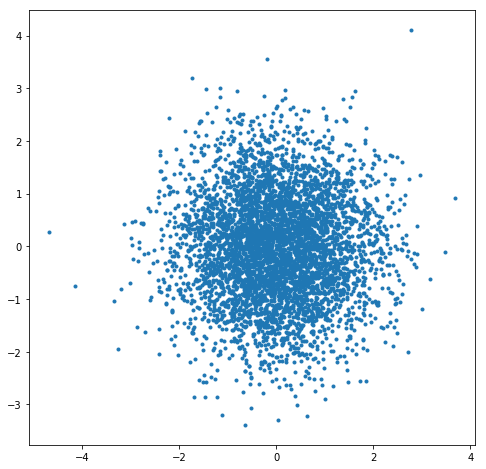

In [12]:
d = np.random.normal(0.0, 1.0, size=(5000,2))
plt.figure(figsize=(8,8))
plt.plot(d[:,0], d[:,1], '.')

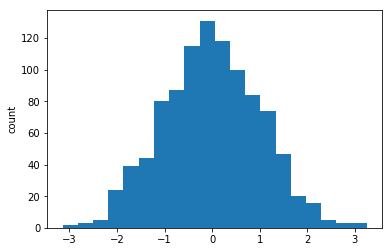

In [13]:
d = np.random.normal(0.0, 1.0, size=1000)
plt.hist(d, bins=20)
plt.ylabel('count')

If we want to generate a sequence of random numbers with a normal distribution with a mean of 66 inches (5'6") and a standard deviation of 3.0, we can do that by simply specifying different parameter for $\mu$ and $\sigma$

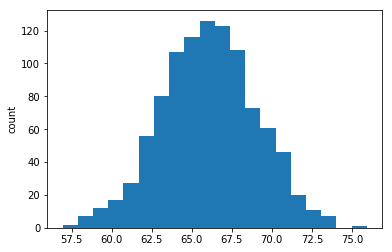

In [14]:
mu = 66.0
sigma = 3.0

d = np.random.normal(mu, sigma, size=1000)
plt.hist(d, bins=20)
plt.ylabel('count')

Please try the previous 2D and histogram plots with larger sample sizes.  What do you observe as your sample size increases?

The Gaussian Probability Density Function
----------------------------------------------

The probability density function (PDF) shows how samples that conform to that distribution should be distributed as the number
of samples drawn goes towards infinity.  The formula for the Gaussian PDF, with a mean $\mu$ and standard deviation $\sigma$ is:

$g(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{(x - \mu)^2}{2 \sigma^2}} $

When the mean $\mu = 0.0$ and the standard deviation $\sigma = 1.0$, the above formula reduces to this, which you may also
sometimes see:

$ g(x) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2} x^2} $

Lets see what the relationship is between the PDF and the samples drawn from
the Gaussian distribution is.  First lets write the general vectorized function for the Gaussian PDF:

In [15]:
def g(x, mu=0.0, sigma=1.0):
    """The Gaussian Probability Distribution Function (PDF).  Given an array
    of values, compute the Gaussian PDF function on each value and return
    the resulting values as a new array.  You can specify a different mean
    of the distribution using the mu parameter, and a different standard
    deviation using the sigma input parameter.
    """
    return 1 / (sigma * (2. * np.pi)**0.5) * np.exp(- (x - mu)**2. / (2. * sigma**2.))

x = np.linspace(-5., 5., 20)
print( x ) 
print( g(x) ) 

[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
[  1.48671951e-06   1.79869558e-05   1.64961696e-04   1.14684672e-03
   6.04400005e-03   2.41457312e-02   7.31228458e-02   1.67865955e-01
   2.92125176e-01   3.85364911e-01   3.85364911e-01   2.92125176e-01
   1.67865955e-01   7.31228458e-02   2.41457312e-02   6.04400005e-03
   1.14684672e-03   1.64961696e-04   1.79869558e-05   1.48671951e-06]


Given the theoretical Gaussian PDF, lets examine the relationship between drawing random samples from this distribution
to the theoretical distribution.

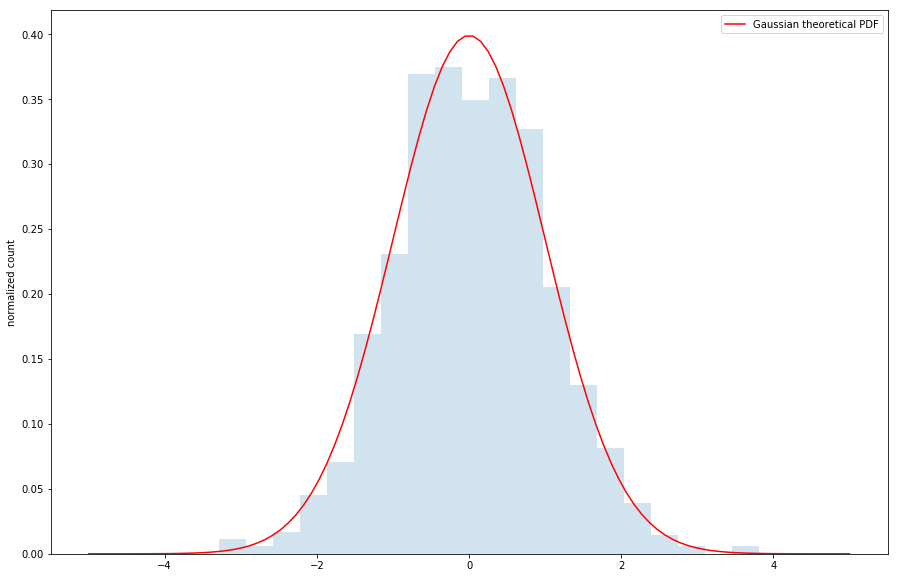

In [16]:
mu = 0.0
sigma = 1.0
plt.figure(figsize=(15,10))

# plot a histogram of randomly drawn samples from the Gaussian distribution
d = np.random.normal(mu, sigma, size=1000)
plt.hist(d, bins=20, normed=True, fill=True, alpha=0.2)

# plot the true Gaussian theoretical PDF
x = np.linspace(-5., 5., 100)
plt.plot(x, g(x), 'r-', label='Gaussian theoretical PDF')
plt.ylabel('normalized count')
plt.legend()

Try the previous cell with more samples, and with more bins.  As more and more random samples are drawn, the samples will
begin to approach the theoretical PDF of the Gaussian distribution.

Drawing Integers
================

So far we have been generating random sequences of floating point numbers.  What if we needed to build a simulation of, 
for example, throwing a 6 sided dice?  In that case we would need to generate a random sequence of integer values 
instead in the range from 1 to 6.  Again with older random number modules, this can be done using the previous 
trick we saw to recast into the appropriate range, then using a type cast in the programming language to 
cast the float to an int.

In [17]:
[ int(random.random() * 5.0 + 1.0) for i in range(10)]

[3, 5, 2, 3, 5, 4, 5, 3, 4, 1]

However, we have to be careful here.  The astute student may have noticed we are not generating any 6's with the
above example recasting.  We didn't mention previously, but the random/rand functions generate a 
random number from 0.0 to 1.0, including the 0.0 starting point, but not including the 1.0 end point.  Thus 
the above code, before casting into an int, can only generate numbers from 1.0 to 5.99999999, and the
int type cast simpy truncates any decimal points.  So we really  have to generate numbers from 1.0 to 
6.999999, so that when we cast into an int, they get truncated (and we still retain the uniform 
probability of generating any of the numbers from 1 to 6).

In [18]:
[ int(random.random() * 6.0 + 1.0) for i in range(10)]

[2, 2, 1, 2, 1, 2, 4, 3, 3, 2]

Since I made a mistake previously, it might be a good idea to test the above implementation, to make sure that we really are
generating all the numbers from 1 to 6 with a uniform distribution.

(array([ 1683.,  1652.,  1649.,  1671.,  1714.,  1631.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 6 Patch objects>)

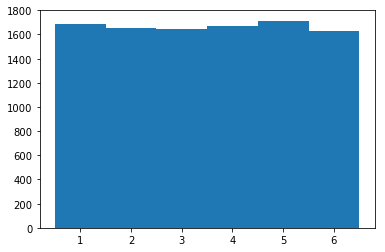

In [19]:
d = [ int(random.random() * 6.0 + 1.0) for i in range(10000)]
plt.hist(d, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5])

It was a little tricky to make the histogram work correctly.  Basically we specify the edges of the bins explicitly
by hand, to make sure all of the 1's end up in the 0.5 $\to$ 1.5 bin, etc.  But in fact this does show that we are
generating the 6 numbers with a good uniform distribution.

Since we are using Python, it is better to use the built in random modules API for generating random integers in 
the desired range.  Make sure you read the documentation, some versions generate sequences that include the endpoint, 
but other don't, you need to use the correct one.  To roll a 6 sided dice, we can  use `randint` from the `random`
module (to generate 1 integer at a time), or likewise use `randint` as well from NumPy.  `randint` somewhat
confusingly in NumPy does not include the endpoint, so we need to add 1 if we want to generate integers 
in the range 1 to 6 inclusive using NumPy's library.

In [20]:
[ random.randint(1, 6) for i in range(10)]

[5, 5, 1, 1, 2, 1, 3, 4, 2, 2]

In [21]:
np.random.randint(1, 6 + 1, (3, 5))

array([[3, 5, 1, 6, 2],
       [3, 2, 2, 4, 2],
       [6, 3, 2, 5, 2]])

Lets show a simple example of a stochastic simulation.  Here we want to compute the probability of throwing a 6 on a 6 sided die.  For a fair dice it should be intuitively obvious (and mathematically provable) that the probability is exactly $\frac{1}{6}$ or 0.166666.  Lets see what happens if we simulate many dice throws.  Try the following with increasingly larger values of N.

**Important**: You should intiutively begin to see that, as the size N of the number of simulations increases, you tend to get closer and closer to the true probability.  More on this later.

In [22]:
N = 1000 # the number of simulated throws
sum = 0
for i in range(N): # xrange() is more computationally efficient/faster than range() when doing large numbers of loops
    d = random.randint(1, 6)
    if d == 6:
        sum += 1
        
print( 'Got six %d times out of %d' % (sum, N) ) 
print( 'Simulated probability = %f' % (float(sum) / float(N)) ) 

Got six 151 times out of 1000
Simulated probability = 0.151000


Drawing a Random Element from a List
------------------------------------

Another common task in creating stochastic simulations is to draw one element at random from a group of items (with or without replacing the item we draw).  The Python and NumPy libraries offer some convenience functions to make random selection of an item from a group easier.  If we want to pick an item from a list of items, we can us random.choice .

In [23]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut']
random.choice(states)

'Arkansas'

The previous drawing of an item does it with replacement, that is to say, the item drawn is still in the states list after we draw it.

In [24]:
print( states ) 

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut']


If you need to do drawing without replacement, you can remove the item you draw from the list.

In [25]:
pick = random.choice(states)
states.remove(pick)
print( pick ) 
print( states ) 

Alabama
['Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut']


An equivalent way of picking items without replacement, is to shuffle the list into a random order, then you can iterate through the list, or pop items from the front of the list.

In [26]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut']
random.shuffle(states)
print( states ) 

['Colorado', 'Arkansas', 'California', 'Connecticut', 'Arizona', 'Alabama', 'Alaska']


Lets do another common example.  Say you want to simulate a card game, and you need to build and shuffle a deck of cards before drawing them for play.

In [27]:
def make_deck():
    ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    suits = ['C', 'D', 'H', 'S'] # Clubs, Diamonds, Hearts, Spades
    deck = []
    for s in suits:
        for r in ranks:
            deck.append(r + s)
    random.shuffle(deck)
    return deck

d = make_deck()
print( d ) 

['7H', '5C', '4H', 'JC', '8H', 'KH', '7S', '4S', '3C', 'QD', '6S', '6C', 'QH', '6D', '9S', 'QS', '7C', '3D', 'KC', '9H', '10H', '6H', 'AS', 'QC', 'KS', '7D', '10D', 'JD', '8C', '8D', '5H', '8S', '10S', '9D', '3S', 'JH', '4C', '10C', '3H', '2C', '5S', 'KD', '2H', 'JS', 'AC', '4D', '9C', 'AH', '2S', '2D', '5D', 'AD']


Given the previously shuffled deck, we could simulate a card game, or whatever we need to do.

Blackjack
----------

Lets use our card shuffling function to simulate a lot of games of blackjack, and see if the odds favor playing against the
house or not.  To keep this reasonable, we are going to use a subset of the real rules of the game.

In blackjack, the dealer and player are each initially dealt 2 cards. The object of the game is to get as close 
to a total of 21, without going over.  The closest player to 21 but not over is the winner.  All numberd cards 
2-10 are worth that number of points.  All face cards, the Jack, Queen, and King, are worth 10 points.  
Normally the Ace can be counted as 1 or 11 points, at the player's discretion.  (The suits do not matter 
and are not used in Blackjack).  To keep things simple for this simulation, Aces will always be counted as 
11 points.

Normally in casinos, one way the house has an advantage is that the house is declared the winner if the player 
and the house have a tie score in their number of points.  This also goes for if both the player and
the dealer go bust (are over 21) on the round, the dealer is also the winner in this case. We will 
use this advantage for the house, and show that playing long enough the "house always wins".  We will 
simulate a simple decision rule for both the player and the house, that if the current total of your 
hand is 11 points or less, then you will 'hit' (e.g. get  another card from the deck), and if your current
points are 12 or greater, you 'stick'.  

Lets first make a small modification to our deck of cards.  We will keep track of the points that each card
is worth, to make counting up points easy:

In [28]:
def make_deck():
    ranks  = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    points = [11,   2,   3,   4,   5,   6,   7,   8,   9,   10,  10,  10,  10]
    suits = ['C', 'D', 'H', 'S'] # Clubs, Diamonds, Hearts, Spades
    deck = []
    for s in suits:
        for r,p in zip(ranks, points):
            deck.append( (r + s, p) )
    random.shuffle(deck)
    return deck

def is_deck_empty(d):
    return len(d) == 0

def count_points(h):
    """Given a list of cards (a hand), count the points of the cards and return this value"""
    points = 0
    for c in h:
        points += c[1]
    return points

def draw_card(d):
    """Draw the top card from the deck and return it.  As a side effect, the deck is modified
    to no longer have the card.  This function also check for an empty deck, so that it can
    create a new shuffled deck whenever needed
    """
    if is_deck_empty(d):
        d = make_deck()
        
    c = d.pop()
    return c

d = make_deck()
print( d ) 
print( count_points(d[:3]) ) 

[('4D', 4), ('10H', 10), ('3C', 3), ('4C', 4), ('7S', 7), ('QD', 10), ('6D', 6), ('JC', 10), ('9S', 9), ('8C', 8), ('5S', 5), ('8D', 8), ('3S', 3), ('6H', 6), ('JH', 10), ('QH', 10), ('10D', 10), ('AS', 11), ('KC', 10), ('2S', 2), ('4H', 4), ('KS', 10), ('7C', 7), ('2C', 2), ('2H', 2), ('8H', 8), ('6C', 6), ('5H', 5), ('3H', 3), ('8S', 8), ('9C', 9), ('5C', 5), ('AD', 11), ('AC', 11), ('2D', 2), ('10C', 10), ('KD', 10), ('6S', 6), ('JD', 10), ('QS', 10), ('10S', 10), ('JS', 10), ('7H', 7), ('7D', 7), ('9H', 9), ('9D', 9), ('5D', 5), ('KH', 10), ('QC', 10), ('4S', 4), ('AH', 11), ('3D', 3)]
17


I also introduced 2 utility functions.  The first will simply be used to determine when we have dealt all the
cards for a deck, and thus must shuffle/create a new deck.  The second can be used to count the points for a hand
of cards, which was demonstrated by counting the points of the first 3 cards of the deck.

The following code, then, will be a function that, given a deck of cards, simulates a single round of
black jack.  We first deal 2 initial cards to the house and the player.  Then each player keeps drawing
cards till their total is above 11.  The return value from this function is simply True if the player wins
the round, and False if the dealer wins.

In [29]:
def play_blackjack_round(d):
    # deal 2 cards to the player and dealer
    dealer_hand = []
    player_hand = []
    dealer_hand.append(draw_card(d))
    player_hand.append(draw_card(d))
    dealer_hand.append(draw_card(d))
    player_hand.append(draw_card(d))

    # player's turn first
    while count_points(player_hand) <= 11:
        player_hand.append(draw_card(d))
        
    # dealer's turn next
    while count_points(dealer_hand) <= 11:
        dealer_hand.append(draw_card(d))
    
    # return false if player went bust
    if count_points(player_hand) > 21:
        return False
    # return true if the dealer went bust
    if count_points(dealer_hand) > 21:
        return True

    # if no one is bust, the player wins only if they have more points
    if count_points(player_hand) > count_points(dealer_hand):
        return True
    else:
        return False

In [30]:
# lets simulate a few rounds, to see if seems to be working...
d = make_deck()
for round in range(5):
    if play_blackjack_round(d) == True:
        print( "The player wins!" ) 
    else:
        print( "The dealer wins :-(" ) 

The player wins!
The player wins!
The dealer wins :-(
The dealer wins :-(
The dealer wins :-(


Ok, lets simulate a larger number of games.   We will bet $1 on each round, thus the player gains a dollar on each
win, and looses a dollar on each loss.  Lets see what he ends up with after 100,000 blackjack hands, with the
house advantages the dealer has:

In [31]:
bank_roll = 0
ROUNDS = int(1e5)
d = make_deck()
for r in range(0, ROUNDS):
    if play_blackjack_round(d): # if true the player won!
        bank_roll += 1
    else: # if false, the house won :-(
        bank_roll -= 1
        
print( "After %d rounds, player has $%d" % (ROUNDS, bank_roll) ) 

After 100000 rounds, player has $-9938


Try it out a few times with only 100 hands, you will ocassionally see that you come out ahead.  But with 
a large enough number of rounds, and the advantages the house has on winning ties, you will find out
that the house always wins if you play enough hands.

In [32]:
%reload_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 2.7.13 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.3.0
OS Linux 4.13.0 32 generic x86_64 with debian stretch sid
numpy 1.13.1
scipy 0.19.1
matplotlib 2.0.2
Mon Feb 19 11:33:37 2018 CST